<a href="https://colab.research.google.com/github/justpablo/tmsql_ml_project1_data_preprocessing/blob/main/EDA_PimaCtyHouses_pabloreynoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enhance IT**
## **Project 1**: *Exploratory Data Analysis (EDA)*
## **Data**: *Tucson, Az (Pima County) Houses for Sale*
## **Profesor**: *Jaime Ruiz*
## **Group**: *The Matrix SQL*
## **Student**: *Pablo Reynoso*
## **Date**: *December 13th, 2021*



### Tucson, Az (Pima County) Houses for Sale

The observations from *Tucson, Az (Pima County) Houses for Sale* dataset describe a potential correlation between house's attributes and a attribute of interes, in particular *Sold Price* for a specific population, *Pima County* [1].

Pima County population is made up of 1,043,433 inhabitants, where the age distribution is centered (53.7%) at age range between 18-65. On the sex distribution, there is a ratio of 1.032 Females per 1 Males. Only 14% of population belong to a poverty class.
Snapshot from 2015-2019 period, described a total number of housing units as 466,299 and a median gross monthly rent of 907 USD. There were registered 404,739 families and living arrangements and average of 2.4 members per family. From total number of households, 92.2% own a computer, while only the 85.4% pay for a broadband internet. On the group of adults older than 25 years old, 88.4% posses a high school diploma or higher, while only the 32.4% earned a bachelor degree diploma or higher. On wages, a median yearly household income lays on 53,379 USD, while household percapita yearly income is 29,707 USD.


[1]https://www.census.gov/quickfacts/fact/table/pimacountyarizona/HSG445219#HSG445219

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn; sn.set()

from scipy.stats import multivariate_normal as mvn


data = pd.read_csv('/content/drive/MyDrive/Classroom/Matrix_SQL/Pablo Reynoso - raw_house_data.csv')

In [37]:
# I) Describing House Attributes
# a) Houses Data Dimensions
print("Dimensions: "+str(data.shape))

# b) Houses Attributes Names
print("\nAttributes Type: \n")
print(data.dtypes)

Dimensions: (5000, 16)

Attributes Type: 

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces           object
floor_covering       object
HOA                  object
dtype: object


In [38]:
# II) Visual Inspection First/Last Rows
print("\nFirst Rows:")
print(data.head())

print("\nLast Rows:")
print(data.tail())


First Rows:
        MLS  sold_price  zipcode  ...  fireplaces                floor_covering   HOA
0  21530491   5300000.0    85637  ...           6            Mexican Tile, Wood     0
1  21529082   4200000.0    85646  ...           5          Natural Stone, Other     0
2   3054672   4200000.0    85646  ...           5    Natural Stone, Other: Rock  None
3  21919321   4500000.0    85646  ...           4  Ceramic Tile, Laminate, Wood  None
4  21306357   3411450.0    85750  ...           5              Carpet, Concrete    55

[5 rows x 16 columns]

Last Rows:
           MLS  sold_price  zipcode  ...  fireplaces        floor_covering   HOA
4995  21810382    495000.0    85641  ...           1  Carpet, Ceramic Tile  None
4996  21908591    550000.0    85750  ...           1  Carpet, Ceramic Tile    43
4997  21832452    475000.0    85192  ...           0          Ceramic Tile  None
4998  21900515    550000.0    85745  ...           1  Carpet, Ceramic Tile  None
4999   4111490    450000.0    8

In [39]:
# III) Descriptive Statistics (central tendency, dispersion, shape of a dataset’s distribution)
print("Descriptive Statistics of House Data Attributes")
data.describe(include='all')

Descriptive Statistics of House Data Attributes


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,5000,5000,5000,5000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,2362,22,1872,11,311,381
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,None,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile",0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,56,2797,1719,1806,1235,824
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['lot_acres']
10
Distribution of values for lot_acres :


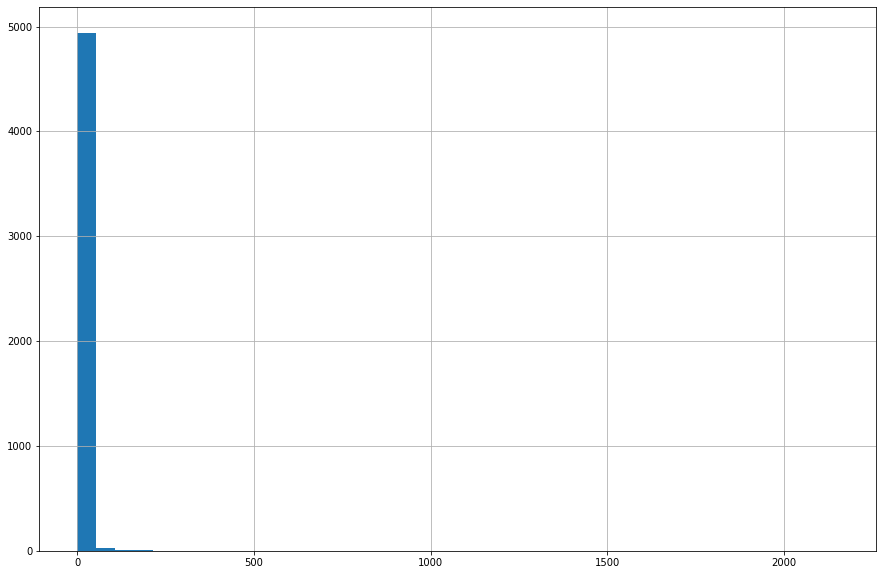

In [40]:
# IV) Check Attributes that contain missing values (np.Nan, pd.Nat, null, None)
attrs_missing_vals = data.columns[data.isna().any()].tolist()
print(attrs_missing_vals)

# V) Check for Number of Nan's/Distribution in the Attributes w/Missing Values
for attr in attrs_missing_vals:
  print(str(data[attr].isnull().sum()))
  print("Distribution of values for "+attr+" :")
  data[attr].hist(bins=40, figsize=(15, 10))

In [48]:
# VI) Inspection for Unique Values (Possible 'None','0' Mistaken) in Numeric Attributes in Order (ASC, DESC)

print(data.columns.tolist())

print("Visual Inspection of Attributes Values Mistaken/Missing: ")
for b in [True, False]:
  print("\n Order = "+str(b))
  for attr in data.columns.tolist():
    print(sorted(data[attr].unique().tolist(), reverse=b))
           
# a) Orderings Inspection Results for Numeric Attributes
#   ASC 3042851, 169000.0, 85118, -112.52, 31.356, 0.0, 0.0, 0
#   DSC 219285565, 5300000.0, 85323, -109.45, 34.92, 2154.0, 12215075.0, 2019
#     -zipcode # NOTE: convert to str variable
#     -lot_acres # NOTE: 0.0/Np.Nan is missing value for lot_acres, interpolate
#     -taxes #NOTE: 0.0 is missing value for taxes, interpolate
#     -year_built #NOTE: 0 is missing value for year_built, interpolate


# b) Ordering Inspection Results for Categoric Attributes
#   ASC '1', '10258', '0', '# of Ovens', ' ', 'Carpet', '0,
#   DSC 'None', 'None', 'None', 'Wet Bar', '9', 'Wood', 'None'
#     -bathrooms #NOTE: 'None' is mistaken value (turn to 0), convert float
#     -sqrt_ft #NOTE: 'None' is a missing value interpolate, convert float
#     -garage #NOTE: 'None' is mistaken value (turn to 0), convert float
#     -kitchen_features #NOTE: 'None' == 'Missing:Kitchen' == 'Missing: All Appliances', normalize strings, convert in string type
#     -fireplaces #NOTE:' ' is mistaken value (turn to 0)
#     -floor_covering #NOTE: 'Other: None' == 'None', normalize to 'Other: None', convert string type
#     -HOA #NOTE 'None' is Missing Value, Convert to float

['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA']
Visual Inspection of Attributes Values Mistaken/Missing: 

 Order = True
[21928565, 21926082, 21925429, 21925307, 21925268, 21925159, 21924575, 21923893, 21923622, 21923597, 21923362, 21923146, 21922893, 21922751, 21922593, 21922140, 21922078, 21921984, 21921894, 21921821, 21921659, 21921635, 21921529, 21921483, 21921325, 21921288, 21921199, 21921170, 21921151, 21920499, 21920454, 21920357, 21920292, 21920224, 21920204, 21920142, 21920107, 21920055, 21920015, 21919908, 21919893, 21919781, 21919748, 21919595, 21919482, 21919457, 21919365, 21919321, 21919301, 21919245, 21919242, 21919178, 21919141, 21919115, 21919083, 21919082, 21919002, 21918981, 21918925, 21918861, 21918808, 21918778, 21918640, 21918621, 21918617, 21918491, 21918477, 21918452, 21918347, 21918237, 21917843, 21917823, 2191776

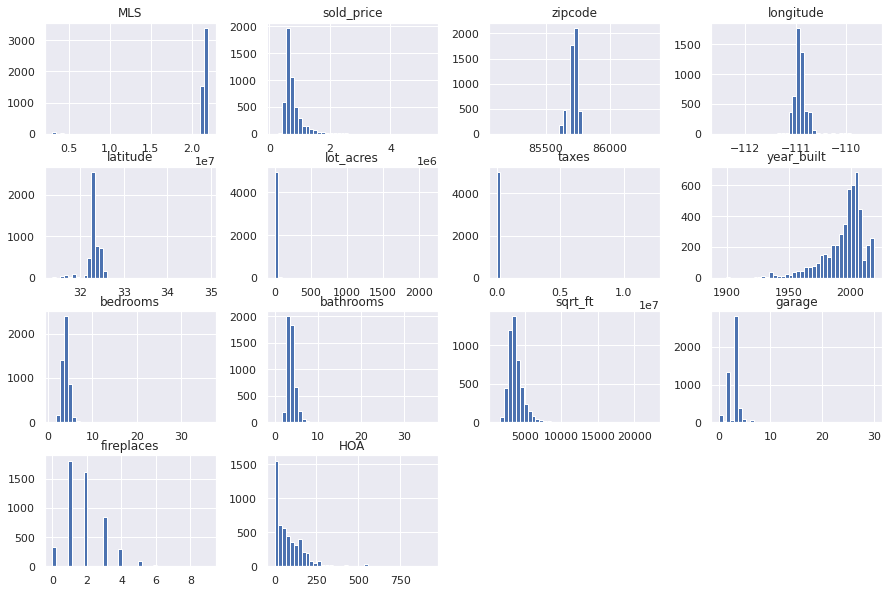

In [100]:
# VII) Check on Attributes Distribution
data.hist(bins=40, figsize=(15, 10))
plt.title('Numeric Attributes Distribution')
plt.legend('Numeric Attributes Distribution: MLS, sold_price, longitude, latitude, lot_acres, taxes, year_built, bedrooms.')
plt.savefig('figure1_numerical_attrs_dist.png')

In [105]:
# Reload Data if Modifications
data = pd.read_csv('/content/drive/MyDrive/Classroom/Matrix_SQL/Pablo Reynoso - raw_house_data.csv')

#VIII) Imputation 

# IMPUTATION NOTES: 
#   KNN / Deep Learning Will be Computationally Costly, therefore mean & interpolation are considered:
#     Assumption 1. Missing Data Completely Random
#     Assumption 2. Missing Data Look Like The Majority or Approximate
#     Assumption 3. Loss of Correlation Between Rest of Attributes
#   The only attribute (numeric, in priniciple) with missing values (np.Nan, pd.Nat, null, None) is 'lot_acres'
#   Attribute distribution is skewed to the left, so we impute with MEDIAN instead MEAN to avoid bias (outliers)
#   ** Linear Interpolation Preserves the Statistics of the Attribue
#   The percentage of missing values in attribute is 0.2% (10/5000) for lot_acres (0.2%)
#   0.2% < 5.0% of observations so the impact of imputation is MINIMUM

# :::Interpolate Cheap Methods:::
# a) Median
  #data['attr'] = data['attr'].fillna((data['attr'].median()))
# b) Mean
  #data['attr'] = data['attr'].fillna((data['attr'].mean()))
# c) Mode (Categorical)
  #data['attr'] = data['attr'].fillna((data['attr'].mode()))
# d) Interpolation Linear
  #data['attr'].interpolate(method ='linear', limit_direction ='forward')
# e) Interpolation Poly 2
#data['attr']interpolate(method="polynomial", order=2, limit_direction='forward')
# f) Interpolation Padding
#data['attr'].interpolate(method="pad", limit=2)

# a) Numeric Attrbutes Imputations

#     -zipcode # NOTE: convert to str variable
#data['zipcode'] = data['zipcode'].astype('category')

#     -lot_acres # NOTE: 0.0/Np.Nan is missing value for lot_acres, interpolate
data['lot_acres'] = np.where(data['lot_acres'] == 0.0, np.nan, data['lot_acres'])
data['lot_acres'] = data['lot_acres'].interpolate(method ='linear', limit_direction ='forward')

#     -taxes #NOTE: 0.0 is missing value for taxes, interpolate
data['taxes'] = np.where(data['taxes'] == 0.0, np.nan, data['taxes'])
data['taxes'] = data['taxes'].interpolate(method ='linear', limit_direction ='forward')

#     -year_built #NOTE: 0 is missing value for year_built, impute mode
data['year_built'] = np.where(data['year_built'] == 0, data['year_built'].mode(), data['year_built'])
#data['year_built'] = data['year_built'].astype('category')

# b) Categorical Attributes Imputations
#     -bathrooms #NOTE: 'None' is mistaken value (turn to 0), convert float
data['bathrooms'] = np.where(data['bathrooms'] == 'None', '0.0', data['bathrooms'])
data['bathrooms'] = data['bathrooms'].astype('float64')

#     -sqrt_ft #NOTE: 'None' is a missing value interpolate, convert float
data['sqrt_ft'] = np.where(data['sqrt_ft'] == 'None', np.nan, data['sqrt_ft'])
data['sqrt_ft'] = data['sqrt_ft'].astype('float64')

#     -garage #NOTE: 'None' is mistaken value (turn to 0), convert float
data['garage'] = np.where(data['garage'] == 'None', '0.0', data['garage'])
data['garage'] = data['garage'].astype('float64')

#     -kitchen_features #NOTE: 'None' == 'Missing:Kitchen' == 'Missing: All Appliances', normalize strings, convert in string type
data['kitchen_features'] = np.where(data['kitchen_features'] == 'None', 'Missing:Kitchen', data['kitchen_features'])
data['kitchen_features'] = np.where(data['kitchen_features'] == 'Missing: All Appliances', 'Missing:Kitchen', data['kitchen_features'])
data['kitchen_features'] = data['kitchen_features'].astype('string')

#     -fireplaces #NOTE:' ' is mistaken value (turn to 0)
data['fireplaces'] = np.where(data['fireplaces'] == ' ', '0', data['fireplaces'])
data['fireplaces'] = data['fireplaces'].astype('int64')

#     -floor_covering #NOTE: 'Other: None' == 'None', normalize to 'Other: None', convert string type
data['floor_covering'] = np.where(data['floor_covering'] == 'None', 'Other: None', data['floor_covering'])
data['floor_covering'] = data['floor_covering'].astype('string')

#     -HOA #NOTE 'None' is Missing Value, interpolate, Convert to float
data['HOA'] = data['HOA'].str.extract('(\d+)', expand=False)
data['HOA'] = np.where(data['HOA'] == 'None', np.nan, data['HOA'])
data['HOA'] = data['HOA'].astype('float64')
data['HOA'] = data['HOA'].interpolate(method ='linear', limit_direction ='forward')


In [106]:
# IX) Remove Duplicates of Rows if Any (None)
data.drop_duplicates(keep="first",inplace=True)


In [107]:
# X) Dropping Redundant Columns
houses = data.drop(['MLS', 'longitude', 'latitude', 'year_built', 'kitchen_features', 'fireplaces', 'floor_covering'], axis=1)

# Why Dropping these Attributes?
# a) MLS has 5000 different values as the number of rows, represents ID
# b) location of the house (Tucson, Az) can be represented with zipcode, no need longitude & latitude
# c) year_built do not apport many useful info if it doesn't come together with specific location
# d) kitchen_features is not a relevant variable for selling a house
# e) floor_covering is not a very important variable for selling a house
# f) fireplaces are not much needed in the desert of Arizona where 90% of time of the year is sunny/hot

print(houses.columns.tolist())
print(houses)
houses.to_csv('pima_cty_clean_data_pabloreynoso.csv')


['sold_price', 'zipcode', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'HOA']
      sold_price  zipcode  lot_acres  ...  sqrt_ft  garage         HOA
0      5300000.0    85637    2154.00  ...  10500.0     0.0    0.000000
1      4200000.0    85646    1707.00  ...   7300.0     0.0    0.000000
2      4200000.0    85646    1707.00  ...      NaN     0.0   18.333333
3      4500000.0    85646     636.67  ...   9019.0     4.0   36.666667
4      3411450.0    85750       3.21  ...   6396.0     3.0   55.000000
...          ...      ...        ...  ...      ...     ...         ...
4995    495000.0    85641       4.98  ...   3601.0     3.0  120.500000
4996    550000.0    85750       1.42  ...   2318.0     3.0   43.000000
4997    475000.0    85192      12.06  ...   1772.0     0.0   43.000000
4998    550000.0    85745       1.01  ...   3724.0     3.0   43.000000
4999    450000.0    85621       4.16  ...   4317.0     0.0   43.000000

[5000 rows x 9 columns]


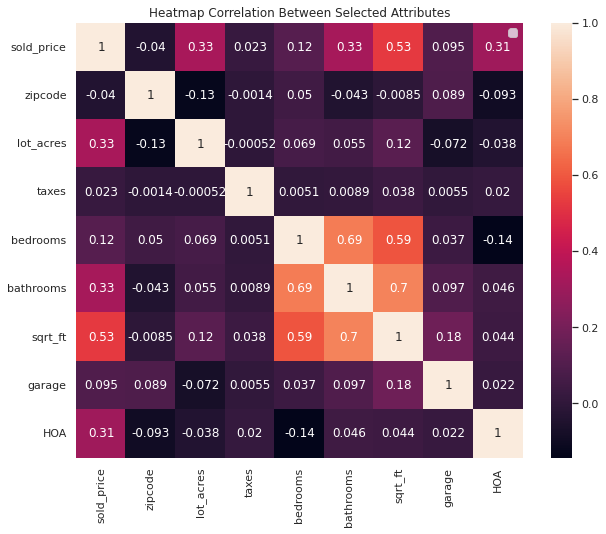

In [89]:
# XI) Correlation Between Selected Attributes (zipcode, lot_acres, taxes, bedrooms, bathrooms, sqrt_ft, garage, HOA) -> sold_price

correlation = houses.corr()
plt.figure(figsize=(10,8))
sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title('Heatmap Correlation Between Selected Attributes')
plt.legend('Heatmap Correlation Between Selected Attributes: sold_price, zipcode, lot_acres, taxes, bedrooms, bathrooms, sqrt_ft, garage, HOA')
plt.savefig('figure2_heatmap_correlations_key_attrs.png')


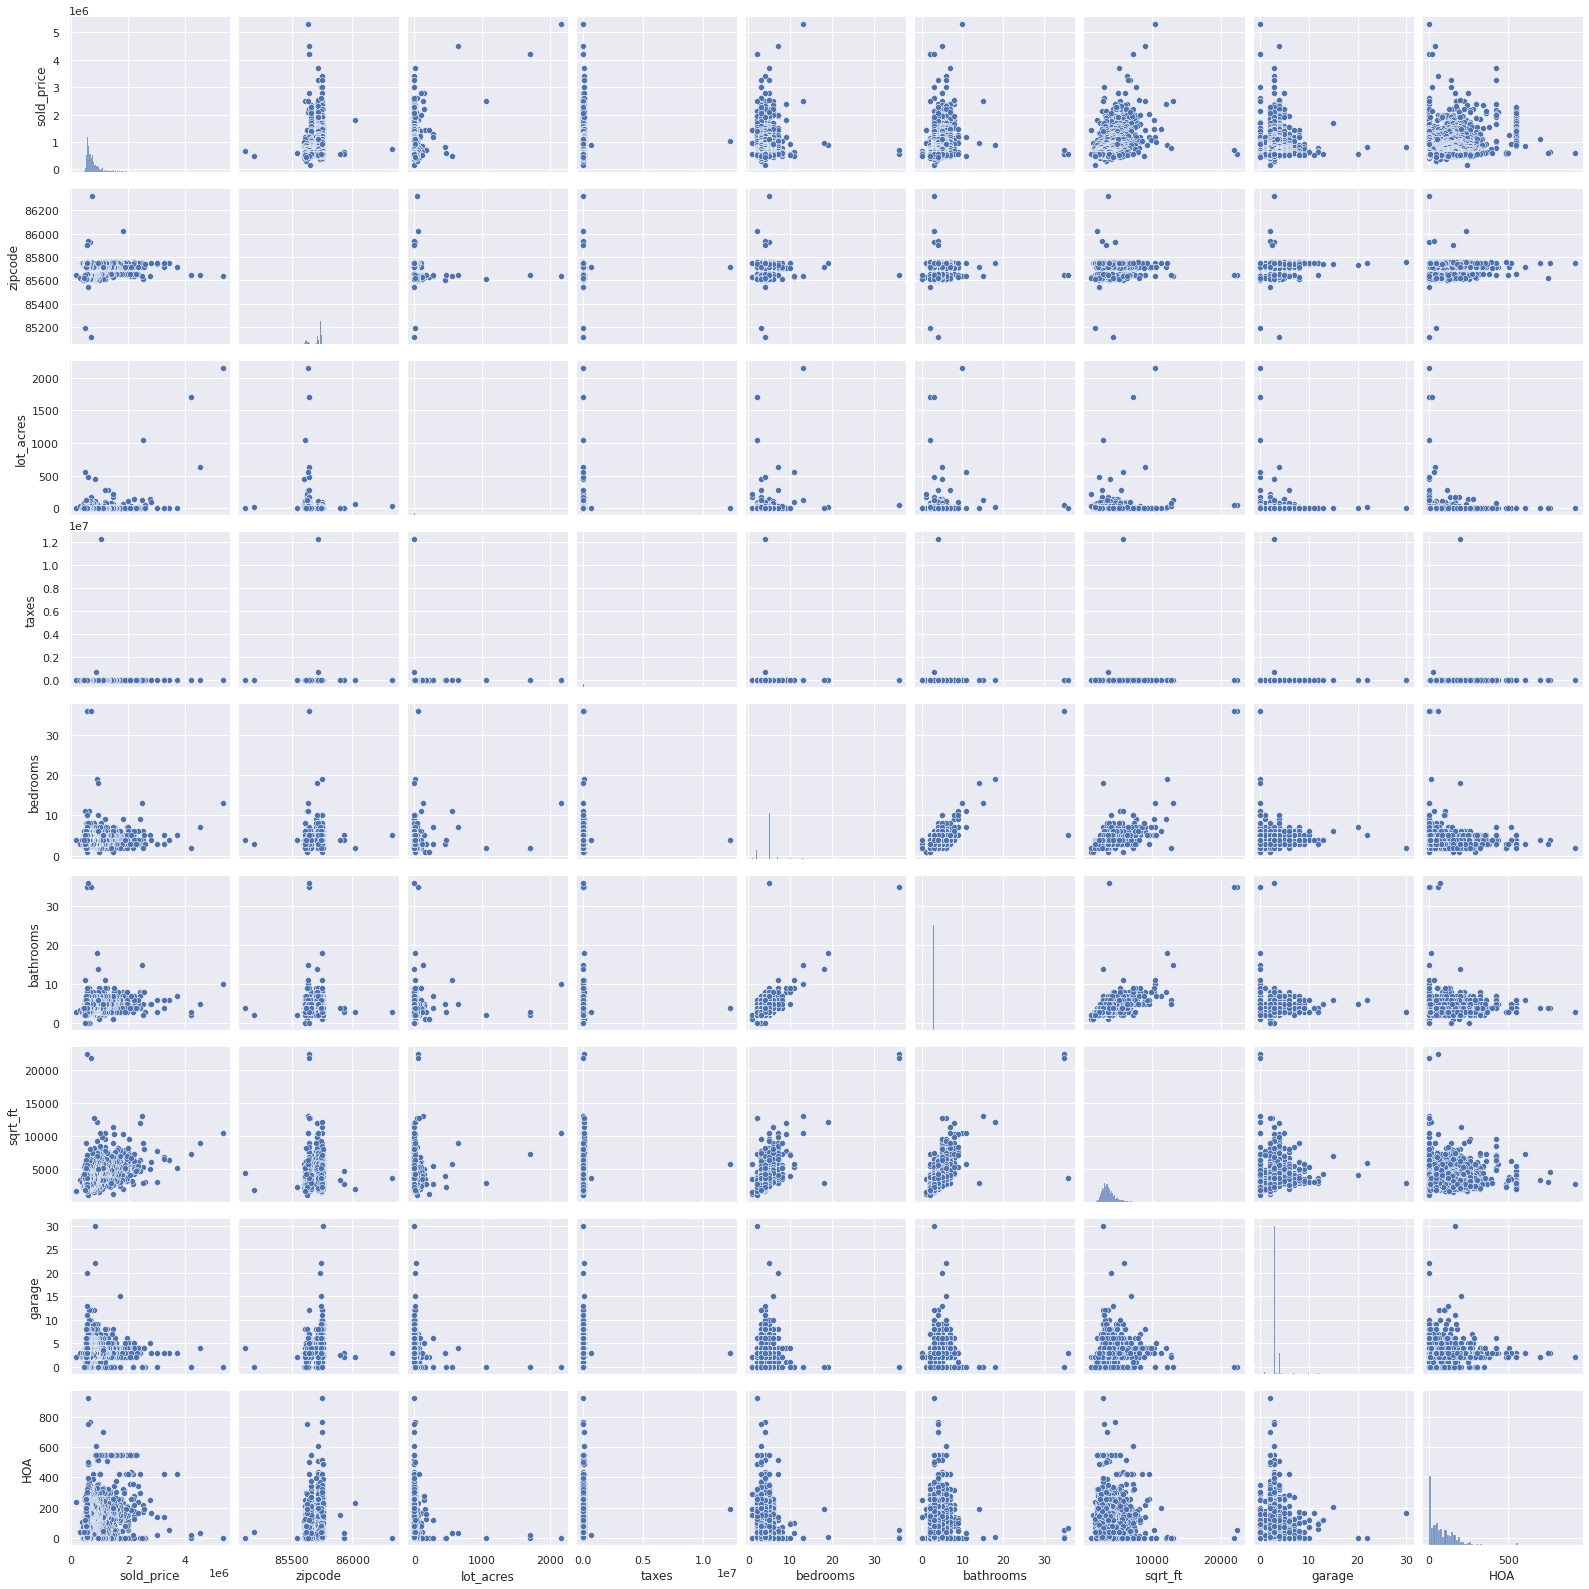

In [95]:
# XII) Pairplot Correlation of Each Pair of Relevant Attributes
sn.pairplot(houses)
#plt.title('Pair Plot Correlation Between Pairs of Selected Attributes')
#plt.legend('Pair Plot - Correlation Between Selected Attributes: sold_price, zipcode, lot_acres, taxes, bedrooms, bathrooms, sqrt_ft, garage, HOA')
plt.savefig('figure3_pairplot_correlations_key_attrs.png')

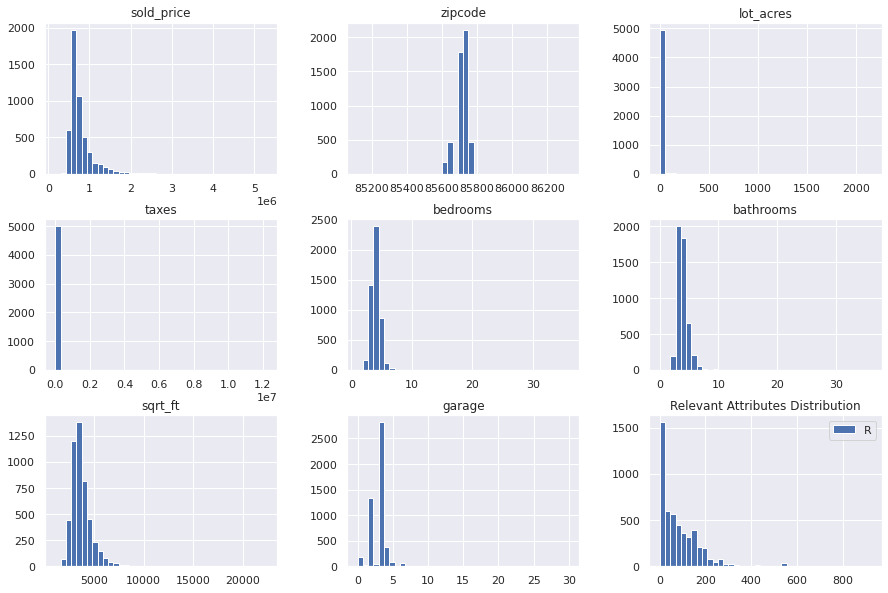

In [92]:
# XIII) Relevant Attributes Distribution
houses.hist(bins=40, figsize=(15, 10))
plt.title('Relevant Attributes Distribution')
plt.legend('Relevant Attributes Distribution: sold_price, zipcode, lot_acres, taxes, bedrooms, bathrooms, sqrt_ft, garage, HOA.')
plt.savefig('figure4_relevant_attrs_dist.png')